In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
sales_df=pd.read_csv("Advertising.csv")
drop_list = ["Unnamed: 0"]

sales_df = sales_df.drop(drop_list, axis=1)
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x=sales_df[['TV','Radio','Newspaper']]
y=sales_df['Sales']

In [ ]:
#to standardize X nad Y features
y=np.array((y-y.mean())/y.std())
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
print(x)

           TV     Radio  Newspaper
0    0.967425  0.979066   1.774493
1   -1.194379  1.080097   0.667903
2   -1.512360  1.524637   1.779084
3    0.051919  1.214806   1.283185
4    0.393196 -0.839507   1.278593
..        ...       ...        ...
195 -1.267759 -1.317724  -0.769287
196 -0.615491 -1.236899  -1.031011
197  0.348934 -0.940539  -1.109069
198  1.590574  1.261955   1.636743
199  0.990720 -0.987687  -1.003461

[200 rows x 3 columns]


In [ ]:
#Implementing Gradient Descent Algorithm
#Random Initialization of the Bias & Weights
import random
def Initialize(dim):
  np.random.seed(seed=42)
  #initializae the bias
  b=random.random()
  #Initalize the weights
  w=np.random.rand(dim)

  return b, w

#dim is the number of weights to be initalized besides the bias.

In [ ]:
b, w = Initialize(3)
print("Bias:",b , "weights:", w)

Bias: 0.01446448141534451 weights: [0.37454012 0.95071431 0.73199394]


In [ ]:
def predict_y( b, w, x):
  return b + np.dot(x,w)


In [ ]:
x.shape
w.shape

(3,)

In [ ]:
print(x.shape)

(200, 3)


In [ ]:
b, w = Initialize(3)
y_hat=predict_y(b,w,x)
y_hat[0:10]

array([ 3.25548383,  1.73183699,  2.84874903,  2.77707852,  0.94847385,
        3.19535325,  0.64633226, -0.32536618, -2.28910673, -0.74404157])

In [ ]:
#Calculating Mean Squared Error
#Calculating Difference between Estimated & Actual
import math
def get_cost(y,y_hat):
  y_resid=y-y_hat#Calculating the residuals i.e. difference between actual & predicted values.
  #then take the sum and divide by number of examples to calculate the mean

  return np.sum(np.matmul(y_resid,y_resid))/len(y_resid)


In [ ]:
b, w = Initialize(3)
y_hat=predict_y(b,w,x)
get_cost(y,y_hat)

1.645980440265177

In [ ]:
#Updating the bias & Weights
def update_beta(x,y,y_hat,b_0,w_0,alpha):
  #gradient of bias
  db=(np.sum(y_hat-y)*2)/len(y)
  # gradient of weights
  dw=(np.dot((y_hat-y),x)*2)/len(y)

  #update bias & weights
  b_1=b_0-alpha*db
  w_1=w_0-alpha*dw
  return b_1,w_1


In [ ]:
b, w = Initialize(3)
print("after initialization - Bias :",b,"weights:",w)
y_hat=predict_y(b,w,x)
b,w = update_beta(x,y,y_hat,b,w,0.01)
print("After update Bias :",b,"Weights :",w)

after initialization - Bias : 0.5547743703874939 weights: [0.37454012 0.95071431 0.73199394]
After update Bias : 0.543678882979744 Weights : [0.38079093 0.9376953  0.71484883]


In [ ]:
# Finding the Optiimal Bias & Weights
# This can be done iteratively untill the cost is minimum & it can take several iterations and it is time consuming.
# by running a fixed number of iterations and use the bias and weights as optimal values at the end
# Run iterations untill the change in cost is small, that is , less than a predefined valye(0.001)

def run_gradient_descent(x,y,alpha=0.01,num_iterations=500):
  #initalize the bias & weights
  b,w =Initialize(x.shape[1])
  iter_num=0
  # gd_iterations keeps track of the cost every 10 iterations
  gd_iterations_df=pd.DataFrame(columns=['iterations','cost'])
  result_idx=0
  #Run the iteration in for loop
  for each_iter in range(num_iterations):
    # calculate the predicted value of Y
    y_hat=predict_y(b,w,x)
    #calculate the cost
    this_cost=get_cost(y,y_hat)
    #Save the Previous bias and weights
    prev_b=b
    prev_w=w
    #update and calculate the new values of bias and weights
    b,w = update_beta(x,y,y_hat,prev_b,prev_w,alpha)

    # for every 10 iterations store the cost i.e. MSE
    if (iter_num % 10 == 0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx+=1
    iter_num+=1
  print("Final estimate of b and w :", b,w)
  #return the final bias, weights and the cost at the end
  return gd_iterations_df,b,w



In [ ]:
gd_iterations_df,b,w=run_gradient_descent(x,y,alpha=0.001,num_iterations=100)

Final estimate of b and w : 0.2962297342137332 [0.43270098 0.83742681 0.5799534 ]


In [ ]:
gd_iterations_df[0:10]

,iterations,cost
0,0.0,1.252407
1,10.0,1.198205
2,20.0,1.146628
3,30.0,1.097548
4,40.0,1.050839
5,50.0,1.006386
6,60.0,0.964076
7,70.0,0.923803
8,80.0,0.885469
9,90.0,0.848976


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


Text(0, 0.5, 'cost of MSE')

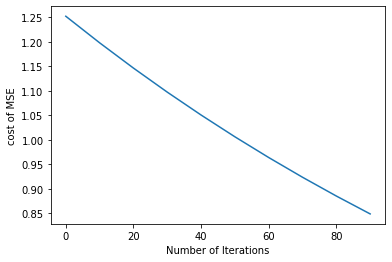

In [ ]:
plt.plot(gd_iterations_df['iterations'],gd_iterations_df['cost']);
plt.xlabel("Number of Iterations")
plt.ylabel("cost of MSE")

In [ ]:
print("final estimates of b and w :",b , w)

final estimates of b and w : 0.2962297342137332 [0.43270098 0.83742681 0.5799534 ]


In [ ]:
alpha_df_1,b,w=run_gradient_descent(x,y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,w=run_gradient_descent(x,y,alpha=0.001,num_iterations=2000)

Final estimate of b and w : 2.7767536948547504e-16 [ 0.75306591  0.53648155 -0.00433069]
Final estimate of b and w : 0.0017433763145125384 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'cost vs Iterations for different alpha values')

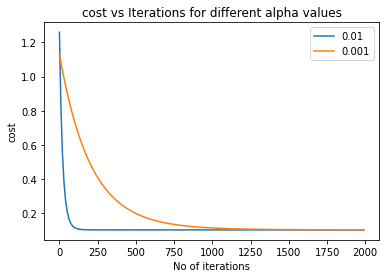

In [ ]:
plt.plot(alpha_df_1['iterations'],alpha_df_1['cost'],label="0.01")
plt.plot(alpha_df_2['iterations'],alpha_df_2['cost'],label="0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel("No of iterations")
plt.title("cost vs Iterations for different alpha values")

In [ ]:
#USING SCIKIT LEARN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sales_df[['TV','Radio','Newspaper']],
                                                 sales_df.Sales,test_size=0.3,random_state = 42)

In [ ]:
len(x_train)

140

In [ ]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64


In [ ]:
len(x_test)

60

In [ ]:
from sklearn.linear_model import LinearRegression
#Initialization of the Model
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg.intercept_

2.7089490925159048

In [ ]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
dict(zip(['TV','Radio','Newspaper'],linreg.coef_))

{'Newspaper': 0.006882452222275487,
 'Radio': 0.19928749689893954,
 'TV': 0.044059280957465224}

In [ ]:
#predicting Yvalues
y_pred=linreg.predict(x_test)

In [ ]:
test_pred_df=pd.DataFrame({'Actual':y_test,'Predicted':np.round(y_pred,2),'Residuals':y_test-y_pred})

In [ ]:
test_pred_df.head()

,Actual,Predicted,Residuals
95,16.9,16.57,0.334604
15,22.4,21.19,1.211772
30,21.4,21.55,-0.151071
158,7.3,10.89,-3.589238
128,24.7,22.20,2.497680


In [ ]:
from sklearn import  metrics
r2 = metrics.r2_score(y_train,linreg.predict(x_train))
print("R Squared: ",r2)
#The model explains 90% of variance in Y

R Squared:  0.9055159502227753


In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
rmse=round(np.sqrt(mse),2)
print("RMSE:",rmse)
#the model prediction has a standard deviation 1.95

RMSE: 1.95


In [ ]:
#HIGH BIAS CAN LEAD TO BUILDING UNDERFITTING MODEL, 
#HIGH VARIANCE CAN LEAD TO OVER FITTING MODEL

